In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df.shape

(381109, 12)

In [7]:
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) < 10:  # Condition for less than 10 unique values
        print(f"Column: {col}")
        
        print(unique_values)
        print("-" * 40)

Column: Gender
['Male' 'Female']
----------------------------------------
Column: Driving_License
[1 0]
----------------------------------------
Column: Previously_Insured
[0 1]
----------------------------------------
Column: Vehicle_Age
['> 2 Years' '1-2 Year' '< 1 Year']
----------------------------------------
Column: Vehicle_Damage
['Yes' 'No']
----------------------------------------
Column: Response
[1 0]
----------------------------------------


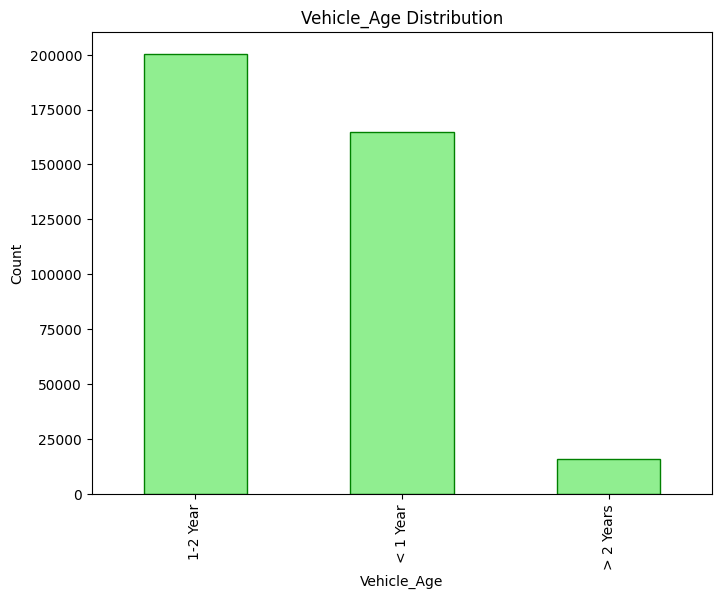

In [8]:
plt.figure(figsize = (8,6))
pclass_count = df["Vehicle_Age"].value_counts()
pclass_count.plot(kind = 'bar', color = 'lightgreen', edgecolor = 'green') 
plt.title('Vehicle_Age Distribution')
plt.xlabel('Vehicle_Age')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

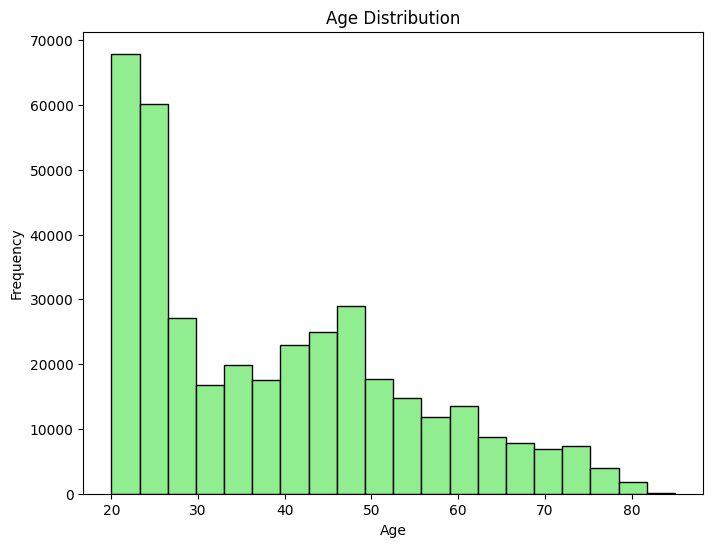

In [9]:
plt.figure(figsize=(8,6))
plt.hist(df['Age'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

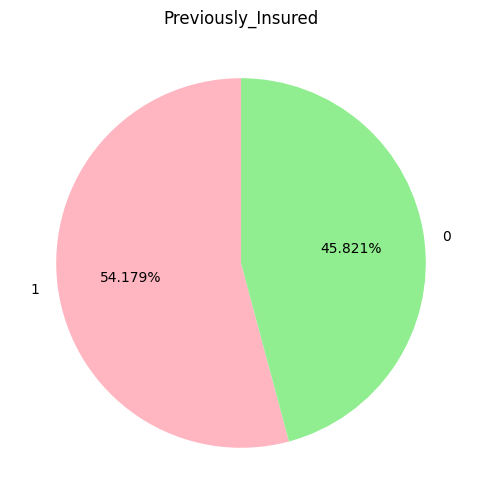

In [10]:
plt.figure(figsize = (8,6))
s_count = df["Previously_Insured"].value_counts()
name = ['1', '0']
plt.pie(s_count, labels = name, autopct = '%1.3f%%', startangle = 90, colors = ['lightpink','lightgreen'])
# autopct -> to display percentage with decimal 
# start angle -> to rotate the pie chart
plt.title("Previously_Insured")
plt.show()

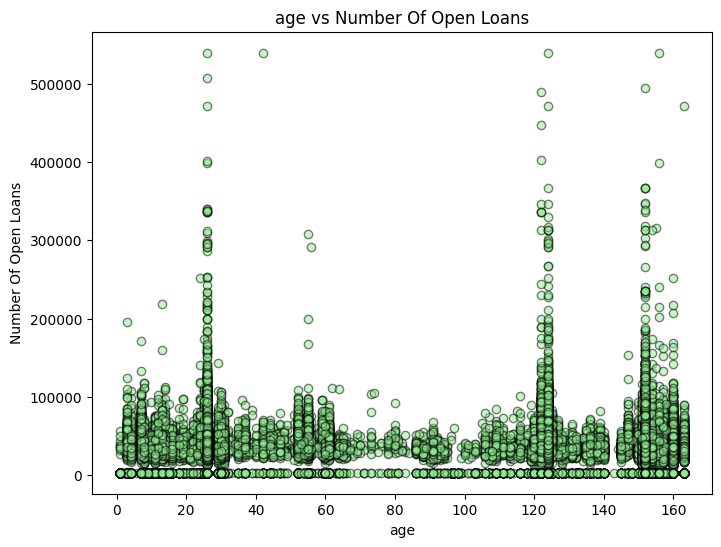

In [11]:
plt.figure(figsize = (8,6))
plt.scatter(df['Policy_Sales_Channel'], df['Annual_Premium'], c = 'lightgreen', edgecolor = 'k', alpha = 0.5)

plt.title('age vs Number Of Open Loans')
plt.xlabel('age')
plt.ylabel('Number Of Open Loans')
plt.show()

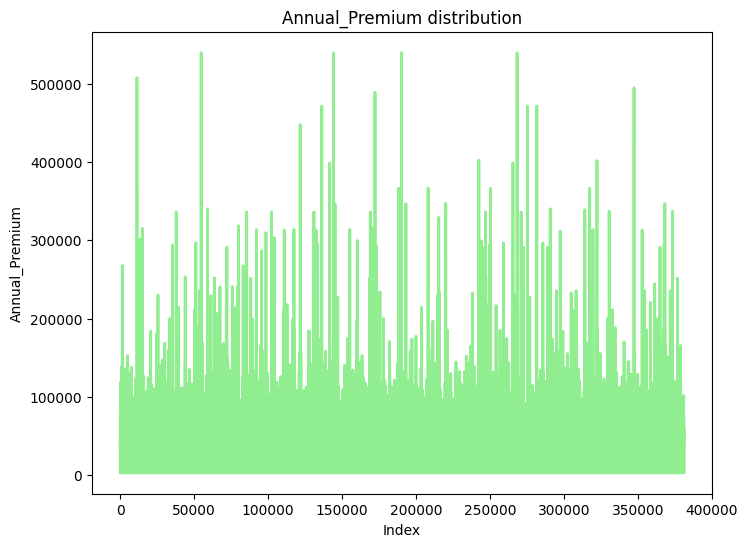

In [13]:
plt.figure(figsize = (8,6))
plt.plot(df.index, df['Annual_Premium'], c = 'lightgreen', lw = 2)

plt.title('Annual_Premium distribution')
plt.xlabel('Index')
plt.ylabel('Annual_Premium')
plt.show()

<Figure size 800x600 with 0 Axes>

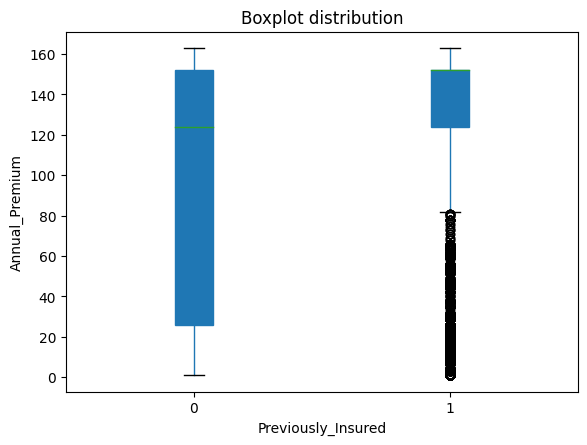

In [14]:
plt.figure(figsize = (8,6))
df.boxplot(column = 'Policy_Sales_Channel', by = 'Previously_Insured', grid = False, patch_artist = True)

plt.suptitle('')
plt.title('Boxplot distribution')
plt.xlabel('Previously_Insured')
plt.ylabel('Annual_Premium')
plt.show()

Random Classifier

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df['Gender'])
df["Vehicle_Age"] = encoder.fit_transform(df['Vehicle_Age'])
df["Vehicle_Damage"] = encoder.fit_transform(df['Vehicle_Damage'])

In [18]:
X = df.drop('Response', axis=1)  
y = df['Response']  

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = clf.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8705098265592611
Confusion Matrix:
[[65640  1059]
 [ 8811   712]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66699
           1       0.40      0.07      0.13      9523

    accuracy                           0.87     76222
   macro avg       0.64      0.53      0.53     76222
weighted avg       0.82      0.87      0.83     76222



Decision Tree

In [23]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred1)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred1)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8237254336018472
Confusion Matrix:
[[59983  6716]
 [ 6720  2803]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66699
           1       0.29      0.29      0.29      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222



Ensemble

In [25]:
from sklearn.ensemble import BaggingClassifier,  AdaBoostClassifier, GradientBoostingClassifier

In [26]:
bagging  = BaggingClassifier(n_estimators=100, random_state=42)

In [27]:
bagging.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [28]:
bagging_pred = bagging.predict(X_test)
bagging_correct = sum(bagging_pred == y_test)
bagging_accuracy = bagging_correct / len(y_test)
print("Bagging accuracy", bagging_accuracy)

Bagging accuracy 0.8686468473669019


In [29]:
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

In [30]:
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=42)

In [31]:
ada_pred = ada.predict(X_test)
ada_correct = sum(ada_pred == y_test)
ada_accuracy = ada_correct / len(y_test)
print("Ada Boost accuracy", ada_accuracy)

Ada Boost accuracy 0.8227021070032274


In [32]:
gd = GradientBoostingClassifier(n_estimators=50, random_state=42)

In [33]:
gd.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [34]:
gda_pred = gd.predict(X_test)
gda_correct = sum(gda_pred == y_test)
gda_accuracy = gda_correct / len(y_test)
print("Gradient Boost accuracy", gda_accuracy)

Gradient Boost accuracy 0.8750623179659416
